In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [36]:
file_path = "LevelAnalysis/LevelTwo/SpreadsheetData/Playtest_Level2_11_11_24.csv"

with open(file_path, "r") as file:
    lines = file.readlines()

filtered_lines = [line for line in lines if not (line.startswith("Link to form") or line.strip(",\n") == "")]

# Convert filtered lines to a DataFrame
from io import StringIO
cleaned_csv = StringIO("".join(filtered_lines))
df = pd.read_csv(cleaned_csv)

df.head()

,Timestamp,SessionID,Most Common State,MCS Overall Data,MCS Data / Checkpoint,Respawn Counts,Diamond Collection Data,Heatmap Data
0,11/11/2024 15:37:29,6.386694e+17,STATE_MED,"{""STATE_SMALL"": 11.25968, ""STATE_MED"": 122.971...","{""Start"": {""STATE_SMALL"": 7.519524, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 1, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-17.0,""y"":0...."
1,11/11/2024 15:51:03,6.386690e+17,STATE_MED,"{""STATE_SMALL"": 6.088501, ""STATE_MED"": 78.9815...","{""Start"": {""STATE_SMALL"": 4.113617, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 2, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-15.0,""y"":2...."
2,11/11/2024 15:57:16,6.386690e+17,STATE_MED,"{""STATE_SMALL"": 20.90089, ""STATE_MED"": 130.672...","{""Start"": {""STATE_SMALL"": 5.404799, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-16.0,""y"":1...."
3,11/11/2024 16:33:54,6.386694e+17,STATE_MED,"{""STATE_SMALL"": 24.87566, ""STATE_MED"": 271.563...","{""Start"": {""STATE_SMALL"": 2.817657, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-13.0,""y"":4...."


In [31]:
# Map session id to a row index
df["SessionID"] = df.index
df.head()

,Timestamp,SessionID,Most Common State,MCS Overall Data,MCS Data / Checkpoint,Respawn Counts,Diamond Collection Data,Heatmap Data
0,11/11/2024 15:37:29,0,STATE_MED,"{""STATE_SMALL"": 11.25968, ""STATE_MED"": 122.971...","{""Start"": {""STATE_SMALL"": 7.519524, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 1, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-17.0,""y"":0...."
1,11/11/2024 15:51:03,1,STATE_MED,"{""STATE_SMALL"": 6.088501, ""STATE_MED"": 78.9815...","{""Start"": {""STATE_SMALL"": 4.113617, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 2, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-15.0,""y"":2...."
2,11/11/2024 15:57:16,2,STATE_MED,"{""STATE_SMALL"": 20.90089, ""STATE_MED"": 130.672...","{""Start"": {""STATE_SMALL"": 5.404799, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-16.0,""y"":1...."
3,11/11/2024 16:33:54,3,STATE_MED,"{""STATE_SMALL"": 24.87566, ""STATE_MED"": 271.563...","{""Start"": {""STATE_SMALL"": 2.817657, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-13.0,""y"":4...."


In [32]:
data = json.loads(df.iloc[0]["Diamond Collection Data"])
data

{'Start': 25,
 'Checkpoint 2': 6,
 'Checkpoint 3': 8,
 'Checkpoint 4': 10,
 'Checkpoint 5': 4,
 'Checkpoint 8': 10,
 'Checkpoint 9': 17}

In [ ]:
def save_plot(figure, save_path):
    figure.savefig(save_path)
    plt.close(figure)

In [ ]:
def plot_mcs_data_overall(datapoint):
   states = list(datapoint.keys())
   fig = plt.figure(figsize=(10, 6))
   time_spent = list(data.values())

   plt.bar(states, time_spent, color='skyblue')
   plt.title("Total Most Common State Data")
   plt.xlabel("State")
   plt.ylabel("Time Spent")
   
   return fig

In [53]:
data = json.loads(df.iloc[0]["MCS Overall Data"])
graph = plot_mcs_data_overall(data)
save_plot(graph, "LevelAnalysis/LevelTwo/Insights/Player0/MCSOverallData.png")


In [ ]:
def plot_mcs_data_checkpoint(datapoint):
    temp_df = pd.DataFrame(datapoint).T
    fig = plt.figure(figsize=(10, 6))
    sns.heatmap(temp_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Time Spent'})
    plt.title("Time Spent in Different States at Each Checkpoint")
    plt.xlabel("Player State")
    plt.ylabel("Checkpoint")
    return fig


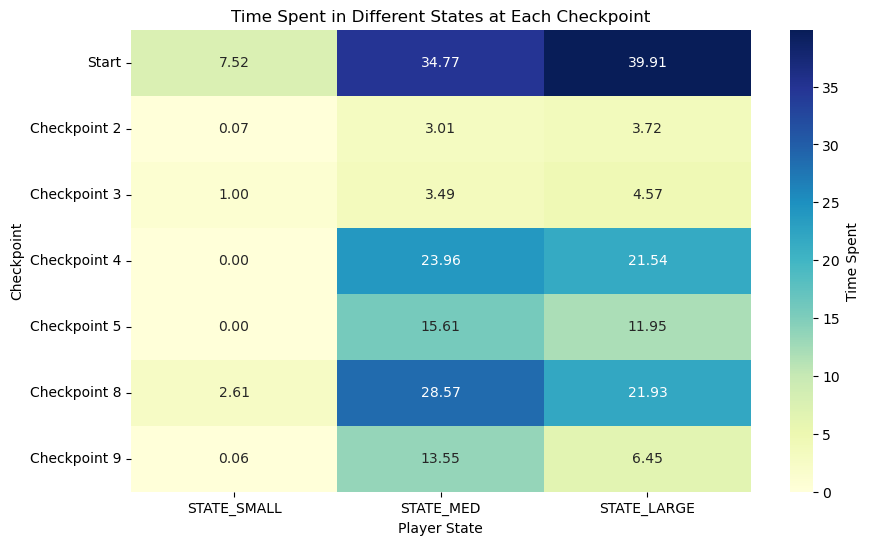

In [39]:
data = json.loads(df.iloc[0]["MCS Data / Checkpoint"])
plot_mcs_data_checkpoint(data)

In [ ]:

def plot_multi_dictionary(datapoint, graph_type):
    checkpoints = list(datapoint.keys())
    fig = plt.figure(figsize=(10, 6))
    counts = list(data.values())

    if graph_type == "respawn":

        plt.bar(checkpoints, counts, color='skyblue')
        plt.title("Respawn Counts at Each Checkpoint")
        plt.xlabel("Checkpoint")
        plt.ylabel("Respawn Count")

    elif graph_type == "diamonds":
        
        plt.bar(checkpoints, counts, color='orange')
        plt.title("Diamond Counts at Each Checkpoint")
        plt.xlabel("Checkpoint")
        plt.ylabel("Diamond Count")
        
    return fig


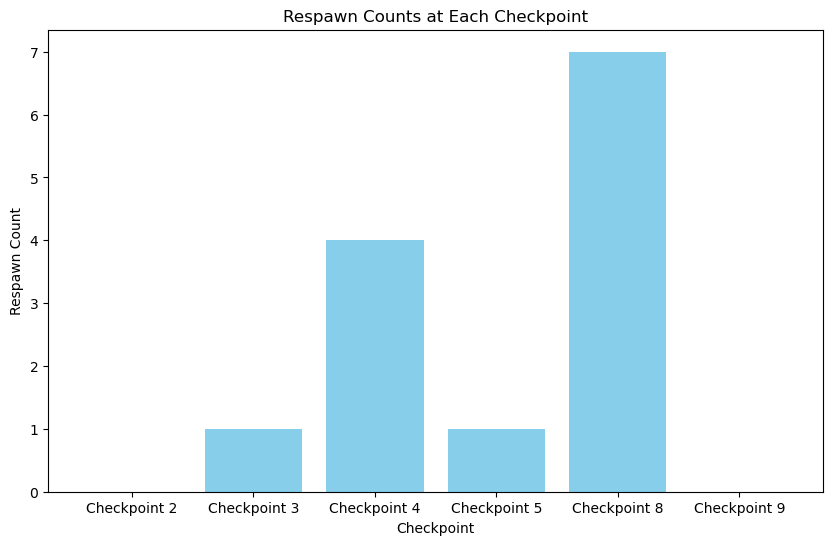

In [43]:
data = json.loads(df.iloc[0]["Respawn Counts"])
plot_multi_dictionary(data, "respawn")

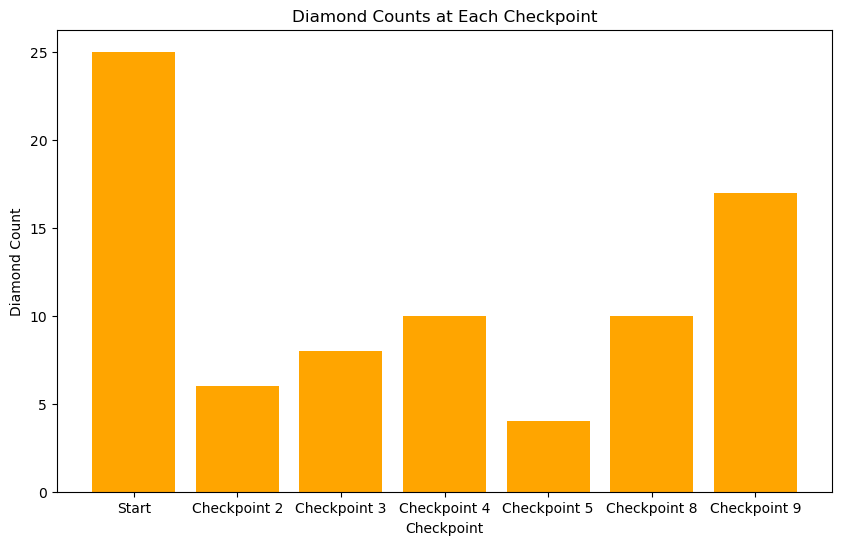

In [42]:
data = json.loads(df.iloc[0]["Diamond Collection Data"])
plot_multi_dictionary(data, "diamonds")

In [ ]:
def plot_heatmap_data(datapoint):
   data = json.loads(datapoint)

   x_coords = [point['x'] for point in data['keys']]
   y_coords = [point['y'] for point in data['keys']]
   values = data['values']

   grid_size = 50
   heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=grid_size, weights=values)
   extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

   fig = plt.figure(figsize=(18, 12))

   # Option 1: Set `vmin` and `vmax` for higher contrast
   plt.subplot(2, 2, 1)
   plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='YlOrRd', vmin=0, vmax=np.percentile(values, 90))
   plt.colorbar(label='Intensity')
   plt.title("Option 1: Adjust `vmin` and `vmax`")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   # Option 2: Use a different color map (e.g., 'hot')
   plt.subplot(2, 2, 2)
   plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot')
   plt.colorbar(label='Intensity')
   plt.title("Option 2: Use 'hot' Color Map")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   # Option 3: Scale the weights to increase intensity
   scaled_values = [v * 1.5 for v in values]  # Adjust the multiplier as needed
   heatmap_scaled, _, _ = np.histogram2d(x_coords, y_coords, bins=grid_size, weights=scaled_values)
   plt.subplot(2, 2, 3)
   plt.imshow(heatmap_scaled.T, extent=extent, origin='lower', cmap='YlOrRd')
   plt.colorbar(label='Intensity')
   plt.title("Option 3: Scale Weights")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   # Option 4: Apply logarithmic scaling for more detail in a wide range of values
   plt.subplot(2, 2, 4)
   plt.imshow(np.log1p(heatmap.T), extent=extent, origin='lower', cmap='YlOrRd')
   plt.colorbar(label='Intensity')
   plt.title("Option 4: Logarithmic Scaling")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   plt.tight_layout()
   # plt.show()
   return fig


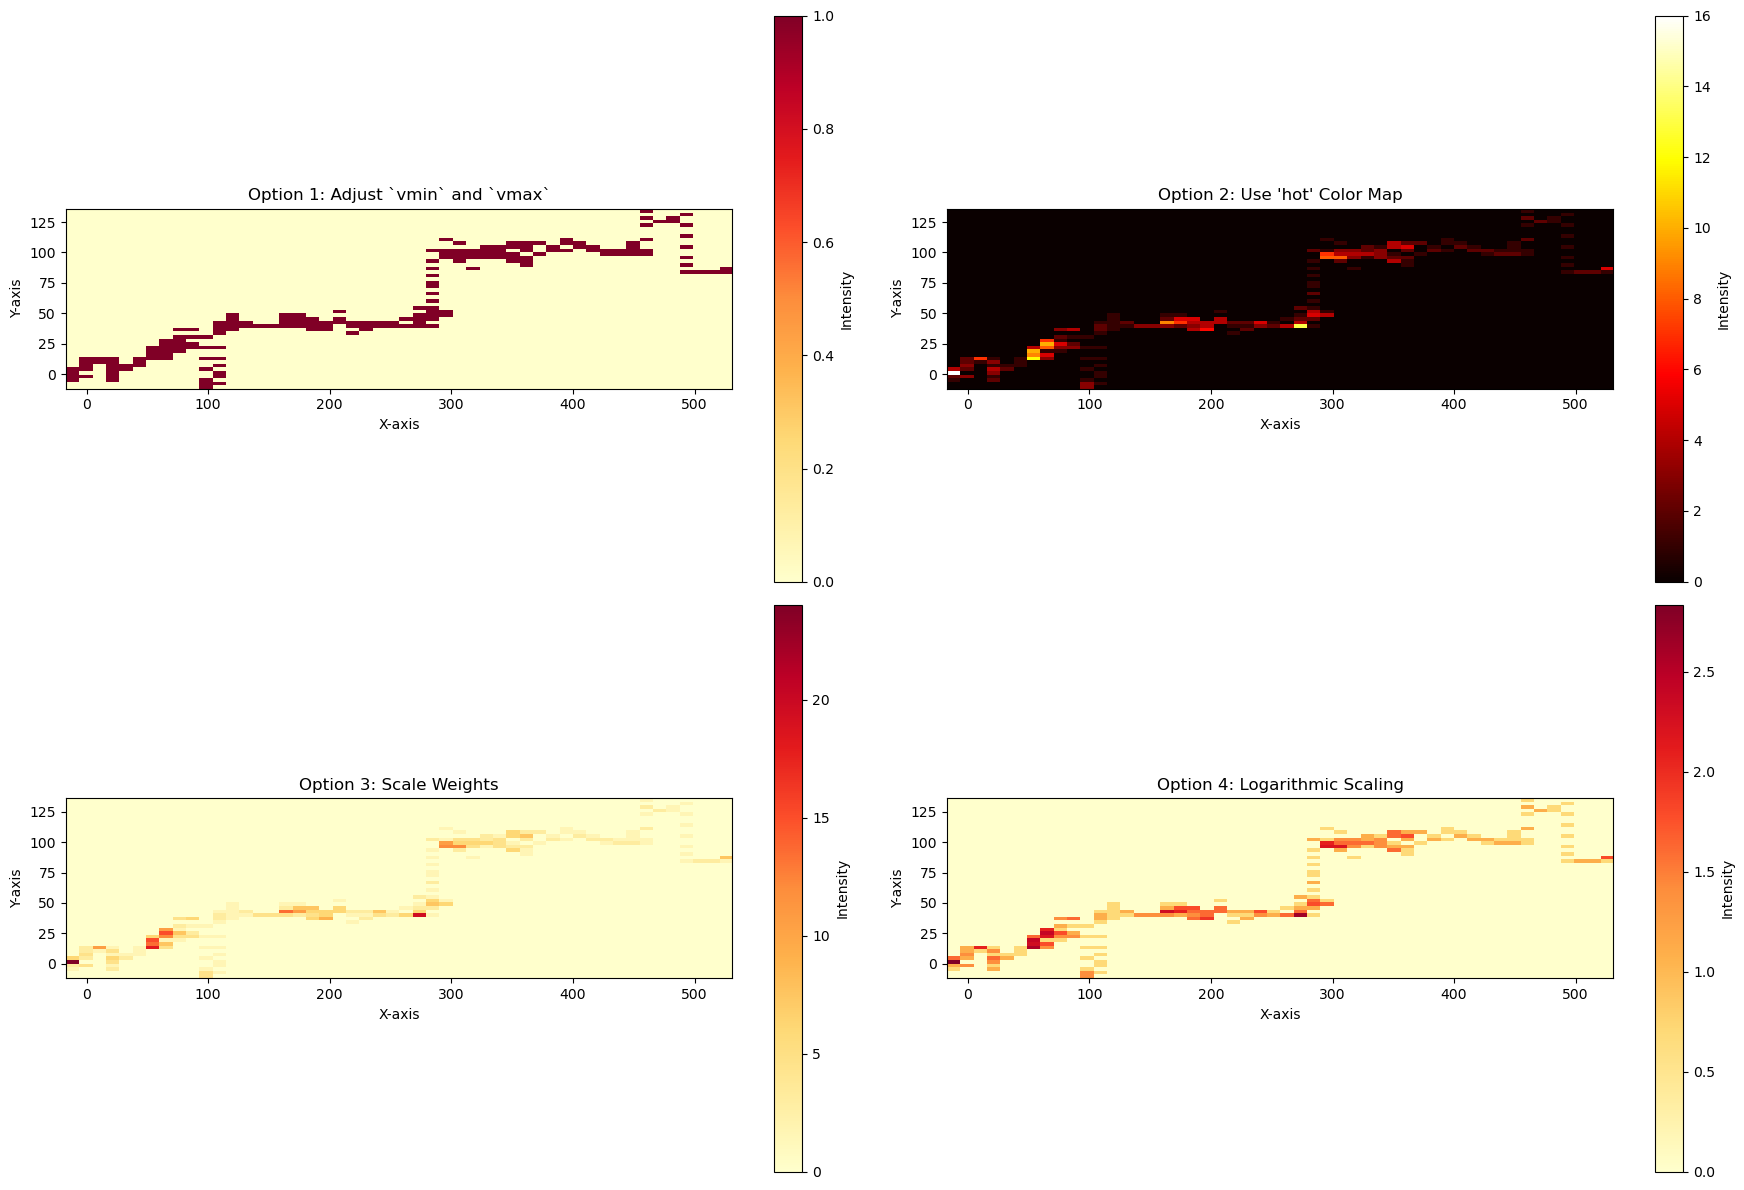

In [48]:
data = df.iloc[0]["Heatmap Data"]
plot_heatmap_data(data)